Data preparation and visualisation using extended genes (+- 2KB)

In [1]:
import pandas as pd
import re


### GTF extended gene data

In [2]:
gtf = pd.read_csv('HepG2_data/RefGenomes/extended_genes.gtf', sep='\t', header=None, names=['chrom', 'source', 'feature_type', 'start', 'end', 'score', 'strand', 'frame', 'attributes'])
display(gtf)

,chrom,source,feature_type,start,end,score,strand,frame,attributes
0,chr1,HAVANA,gene,9869,16409,.,+,.,"gene_id ""ENSG00000223972.5""; gene_type ""transc..."
1,chr1,HAVANA,transcript,9869,16409,.,+,.,"gene_id ""ENSG00000223972.5""; transcript_id ""EN..."
2,chr1,HAVANA,exon,9869,14227,.,+,.,"gene_id ""ENSG00000223972.5""; transcript_id ""EN..."
3,chr1,HAVANA,exon,10613,14721,.,+,.,"gene_id ""ENSG00000223972.5""; transcript_id ""EN..."
4,chr1,HAVANA,exon,11221,16409,.,+,.,"gene_id ""ENSG00000223972.5""; transcript_id ""EN..."
...,...,...,...,...,...,...,...,...,...
1709975,GL000220.1,ENSEMBL,transcript,153997,158149,.,+,.,"gene_id ""ENSG00000273730.1""; transcript_id ""EN..."
1709976,GL000220.1,ENSEMBL,exon,153997,158149,.,+,.,"gene_id ""ENSG00000273730.1""; transcript_id ""EN..."
1709977,GL000225.1,ENSEMBL,gene,181252,185364,.,+,.,"gene_id ""ENSG00000276711.1""; gene_type ""snRNA""..."
1709978,GL000225.1,ENSEMBL,transcript,181252,185364,.,+,.,"gene_id ""ENSG00000276711.1""; transcript_id ""EN..."


### WGBS Data - loading and aggregating by gene
- running out of memory - will need to use Kaya

In [8]:
wgbs_df = pd.read_csv('HepG2_data/HepG2_DNAm/processed/ENCFF857YRG.bed', sep='\t', names=['chrom', 'chromStart', 'chromEnd', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'reserved', 'readCount', 'percentMeth', 'refContext', 'calledContext'], header=None, index_col=False)
display(wgbs_df)

C:\Users\julia\AppData\Local\Temp\ipykernel_21280\2464708623.py:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  wgbs_df = pd.read_csv('HepG2_data/HepG2_DNAm/processed/ENCFF857YRG.bed', sep='\t', names=['chrom', 'chromStart', 'chromEnd', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'reserved', 'readCount', 'percentMeth', 'refContext', 'calledContext'], header=None, index_col=False)


,chrom,chromStart,chromEnd,name,score,strand,thickStart,thickEnd,reserved,readCount,percentMeth,refContext,calledContext
0,chr1,10468,10469,1,1,+,10468,10469,"0,255,0",1,0,CG,CN
1,chr1,10496,10497,1,1,+,10496,10497,"255,0,0",1,100,CG,CG
2,chr1,10524,10525,1,1,+,10524,10525,"255,0,0",1,100,CG,CG
3,chr1,10541,10542,1,1,+,10541,10542,"255,0,0",1,100,CG,CG
4,chr1,10562,10563,1,1,+,10562,10563,"255,0,0",1,100,CG,CG
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48943430,chrY_KI270740v1_random,35612,35613,1,3,-,35612,35613,"0,255,0",3,0,CG,CG
48943431,chrY_KI270740v1_random,35645,35646,1,1,+,35645,35646,"0,255,0",1,0,CG,CG
48943432,chrY_KI270740v1_random,35646,35647,1,2,-,35646,35647,"0,255,0",2,0,CG,CG
48943433,chrY_KI270740v1_random,35685,35686,1,1,+,35685,35686,"0,255,0",1,0,CG,CG


In [47]:
wgbs_annotated_df = pd.read_csv('HepG2_data/HepG2_DNAm/annotated/wgbs_extended_gene_annotations.bed', sep='\t', names=['chrom', 'chromStart', 'chromEnd','strand','percentMeth', 'chrom_g', 'feature_type_g', 'start_g', 'end_g', 'attributes_g'], usecols=[0,1,2,5,10,14,16,17,18,22], header=None, index_col=False, nrows=100)
display(wgbs_annotated_df)

,chrom,chromStart,chromEnd,strand,percentMeth,chrom_g,feature_type_g,start_g,end_g,attributes_g
0,chr1,10468,10469,+,0,chr1,exon,9869,14227,"gene_id ""ENSG00000223972.5""; transcript_id ""EN..."
1,chr1,10468,10469,+,0,chr1,transcript,10010,15670,"gene_id ""ENSG00000223972.5""; transcript_id ""EN..."
2,chr1,10468,10469,+,0,chr1,exon,10010,14057,"gene_id ""ENSG00000223972.5""; transcript_id ""EN..."
3,chr1,10468,10469,+,0,chr1,exon,10179,14227,"gene_id ""ENSG00000223972.5""; transcript_id ""EN..."
4,chr1,10468,10469,+,0,chr1,gene,9869,16409,"gene_id ""ENSG00000223972.5""; gene_type ""transc..."
...,...,...,...,...,...,...,...,...,...,...
95,chr1,14709,14710,+,57,chr1,transcript,9869,16409,"gene_id ""ENSG00000223972.5""; transcript_id ""EN..."
96,chr1,14709,14710,+,57,chr1,exon,11221,16409,"gene_id ""ENSG00000223972.5""; transcript_id ""EN..."
97,chr1,14709,14710,+,57,chr1,gene,12404,31570,"gene_id ""ENSG00000227232.5""; gene_type ""unproc..."
98,chr1,14709,14710,+,57,chr1,transcript,12404,31570,"gene_id ""ENSG00000227232.5""; transcript_id ""EN..."


In [54]:
wgbs_aggregated_df = pd.read_csv('HepG2_data/HepG2_DNAm/aggregated/wgbs_aggregated_gene_counts.csv')
wgbs_aggregated_df = wgbs_aggregated_df.rename(columns={"count":"methyl_count"})
display(wgbs_aggregated_df)

,gene_id,methyl_count
0,ENSG00000000003.14,356
1,ENSG00000000005.5,170
2,ENSG00000000419.12,803
3,ENSG00000000457.13,786
4,ENSG00000000460.16,2690
...,...,...
58222,ENSG00000285990.1,119
58223,ENSG00000285991.1,2046
58224,ENSG00000285992.1,213
58225,ENSG00000285993.1,72


### RNA Data - loading and dropping columns

In [4]:
#loading RNA Quant file data
RNA_geneQuant_df = pd.read_csv('HepG2_data/HepG2_DNAm/ENCFF649XOG.tsv', sep='\t', header=0)
display(RNA_geneQuant_df)

,gene_id,transcript_id(s),length,effective_length,expected_count,TPM,FPKM,posterior_mean_count,posterior_standard_deviation_of_count,pme_TPM,pme_FPKM,TPM_ci_lower_bound,TPM_ci_upper_bound,TPM_coefficient_of_quartile_variation,FPKM_ci_lower_bound,FPKM_ci_upper_bound,FPKM_coefficient_of_quartile_variation
0,10904,10904,93.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,12954,12954,94.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,12956,12956,72.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,12958,12958,82.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,12960,12960,73.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59521,gSpikein_ERCC-00165,tSpikein_ERCC-00165,872.0,700.78,87.0,4.47,8.43,87.0,0.0,4.33,8.42,3.439680,5.244820,0.071704,6.672670,10.182700,0.071661
59522,gSpikein_ERCC-00168,tSpikein_ERCC-00168,1024.0,852.78,1.0,0.04,0.08,1.0,0.0,0.08,0.16,0.002566,0.194005,0.474234,0.005171,0.377749,0.474374
59523,gSpikein_ERCC-00170,tSpikein_ERCC-00170,1023.0,851.78,51.0,2.16,4.07,51.0,0.0,2.10,4.09,1.548640,2.687830,0.093629,3.011470,5.228390,0.093579
59524,gSpikein_ERCC-00171,tSpikein_ERCC-00171,505.0,333.85,3942.0,425.45,802.16,3942.0,0.0,406.87,791.53,394.250000,419.834000,0.010739,767.089000,816.791000,0.010720


In [5]:
# filter rna rows to include only the genes
rna_genes = RNA_geneQuant_df.loc[RNA_geneQuant_df['gene_id'].str.contains("ENS")]
display(rna_genes)

,gene_id,transcript_id(s),length,effective_length,expected_count,TPM,FPKM,posterior_mean_count,posterior_standard_deviation_of_count,pme_TPM,pme_FPKM,TPM_ci_lower_bound,TPM_ci_upper_bound,TPM_coefficient_of_quartile_variation,FPKM_ci_lower_bound,FPKM_ci_upper_bound,FPKM_coefficient_of_quartile_variation
649,ENSG00000000003.14,"ENST00000373020.8,ENST00000494424.1,ENST000004...",2179.14,2007.92,2019.00,36.23,68.31,2019.00,0.00,34.91,67.91,3.334520e+01,36.533100,0.015839,6.478720e+01,70.974500,0.015831
650,ENSG00000000005.5,"ENST00000373031.4,ENST00000485971.1",940.50,769.31,0.00,0.00,0.00,0.00,0.00,0.12,0.24,1.760980e-03,0.313410,0.511119,3.288750e-03,0.609651,0.511279
651,ENSG00000000419.12,"ENST00000371582.8,ENST00000371584.8,ENST000003...",1078.03,906.82,887.00,35.24,66.45,887.00,0.00,34.27,66.67,3.199170e+01,36.595700,0.023183,6.222900e+01,71.169600,0.023156
652,ENSG00000000457.13,"ENST00000367770.5,ENST00000367771.10,ENST00000...",3488.94,3317.73,258.00,2.80,5.28,258.00,0.00,2.79,5.43,2.313660e+00,3.287400,0.060300,4.505810e+00,6.399090,0.060332
653,ENSG00000000460.16,"ENST00000286031.10,ENST00000359326.8,ENST00000...",2911.75,2740.54,879.00,11.56,21.79,879.00,0.00,11.50,22.37,1.024230e+01,12.846600,0.039000,1.991680e+01,24.984000,0.038972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59424,ENSG00000285990.1,ENST00000649331.1,647.00,475.81,0.75,0.06,0.11,1.80,1.60,0.20,0.39,5.294150e-06,0.530734,0.602857,1.030280e-05,1.032140,0.602870
59425,ENSG00000285991.1,ENST00000647612.1,5065.00,4893.78,14.93,0.11,0.21,17.18,5.91,0.13,0.25,4.175390e-02,0.234562,0.266380,7.841970e-02,0.453671,0.266300
59426,ENSG00000285992.1,ENST00000648949.1,956.00,784.78,0.00,0.00,0.00,0.00,0.00,0.04,0.09,1.021180e-06,0.131430,0.654743,2.449570e-06,0.255766,0.654939
59427,ENSG00000285993.1,ENST00000650266.1,1246.00,1074.78,0.00,0.00,0.00,0.00,0.00,0.03,0.06,2.000310e-06,0.095424,0.654978,3.892870e-06,0.185655,0.655171


In [6]:
# each row = 1 gene (already aggregated) so selecting necessary columns

rna_genes_expected_count = rna_genes[['gene_id', 'expected_count']]
display(rna_genes_expected_count)

,gene_id,expected_count
649,ENSG00000000003.14,2019.00
650,ENSG00000000005.5,0.00
651,ENSG00000000419.12,887.00
652,ENSG00000000457.13,258.00
653,ENSG00000000460.16,879.00
...,...,...
59424,ENSG00000285990.1,0.75
59425,ENSG00000285991.1,14.93
59426,ENSG00000285992.1,0.00
59427,ENSG00000285993.1,0.00


### Hsitone data - loading and aggregating by gene

columns: (from ` head -30 HepG2_data/HepG2_histone/ENCFF170GMN.bigBed`)
"BED6+4 Peaks of signal enrichment based on pooled, normalized (interpreted) data."
 
 (
- string chrom;        "Reference sequence chromosome or scaffold"
- uint   chromStart;   "Start position in chromosome"
- uint   chromEnd;     "End position in chromosome"
- string name;     "Name given to a region (preferably unique). Use . if no name is assigned"
- uint   score;        "Indicates how dark the peak will be displayed in the browser (0-1000) "
- char[1]  strand;     "+ or - or . for unknown"
- float  signalValue;  "Measurement of average enrichment for the region"
- float  pValue;       "Statistical significance of signal value (-log10). Set to -1 if not used."
- float  qValue;       "Statistical significance with multiple-test correction applied (FDR -log10). Set to -1 if not used."
- int   peak;         "Point-source called for this peak; 0-based offset from chromStart. Set to -1 if no point-source called."

)

In [6]:
# loading pseudoreplicated peak files
histone_peaks_K9_df = pd.read_csv('HepG2_data/HepG2_histone/processed/ENCFF170GMN.bed', sep='\t', header=None, names=['chrom', 'chromStart', 'chromEnd', 'name', 'score', 'strand', 'signalValue', 'pValue', 'qValue', 'peak'])
histone_peaks_K27_df = pd.read_csv('HepG2_data/HepG2_histone/processed/ENCFF841QVP.bed', sep='\t', header=None, names=['chrom', 'chromStart', 'chromEnd', 'name', 'score', 'strand', 'signalValue', 'pValue', 'qValue', 'peak'])

display(histone_peaks_K9_df)
display(histone_peaks_K27_df)

,chrom,chromStart,chromEnd,name,score,strand,signalValue,pValue,qValue,peak
0,chr1,788438,790667,Peak_33943,206,.,4.85493,20.69931,18.43085,635
1,chr1,991782,992368,Peak_49693,167,.,5.23056,16.71326,14.64974,235
2,chr1,1112984,1113962,Peak_13060,297,.,7.35106,29.75177,27.03791,471
3,chr1,1194302,1195375,Peak_6971,362,.,8.27128,36.28568,33.31710,650
4,chr1,1770030,1770624,Peak_107498,98,.,3.79372,9.87359,8.21870,315
...,...,...,...,...,...,...,...,...,...,...
148025,chrY,26667979,26668865,Peak_48031,172,.,4.20870,17.27292,15.19134,673
148026,chrY,26668976,26671930,Peak_4,1000,.,6.71736,200.44463,194.12437,2116
148027,chrY,26672410,26672736,Peak_91129,112,.,3.60158,11.25807,9.52160,94
148028,chrY,56679663,56680112,Peak_60182,151,.,4.94783,15.15114,13.17521,124


,chrom,chromStart,chromEnd,name,score,strand,signalValue,pValue,qValue,peak
0,chr1,100236060,100236175,Peak_91116,33,.,3.38068,3.39518,0.84457,88
1,chr1,100538099,100538408,Peak_9577,65,.,5.03472,6.59658,2.72930,79
2,chr1,101135095,101135210,Peak_97001,32,.,3.29575,3.26597,0.83925,47
3,chr1,101236811,101237102,Peak_17149,61,.,4.77464,6.16004,2.57973,107
4,chr1,101237336,101237500,Peak_87875,36,.,3.27881,3.62443,1.03439,55
...,...,...,...,...,...,...,...,...,...,...
51278,chrX,848527,848652,Peak_65447,43,.,3.93203,4.39984,1.48232,36
51279,chrX,8742048,8742163,Peak_65448,43,.,3.93203,4.39984,1.48232,26
51280,chrX,915821,915961,Peak_5605,77,.,6.13741,7.77377,3.56466,85
51281,chrX,9295740,9295902,Peak_31774,54,.,4.48337,5.46977,2.10106,87


In [7]:
#annotated peak data

h3k9me3_pp_annotated_df = pd.read_csv('HepG2_data/HepG2_histone/annotated/combined_H3K9me3_pp_annotations.bed', sep='\t', header=None, names=['chrom', 'chromStart', 'chromEnd', 'name', 'score', 'strand', 'signalValue', 'pValue', 'qValue', 'peak', 'chrom_g', 'source_g', 'feature_type_g', 'start_g', 'end_g', 'score_g', 'strand_g', 'frame_g', 'attributes_g'])
h3k27me3_pp_annotated_df = pd.read_csv('HepG2_data/HepG2_histone/annotated/combined_H3K27me3_pp_annotations.bed', sep='\t', header=None, names=['chrom', 'chromStart', 'chromEnd', 'name', 'score', 'strand', 'signalValue', 'pValue', 'qValue', 'peak', 'chrom_g', 'source_g', 'feature_type_g', 'start_g', 'end_g', 'score_g', 'strand_g', 'frame_g', 'attributes_g'])
display(h3k9me3_pp_annotated_df)
display(h3k27me3_pp_annotated_df)

C:\Users\julia\AppData\Local\Temp\ipykernel_15960\593313902.py:3: DtypeWarning: Columns (10,11,12,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  h3k9me3_pp_annotated_df = pd.read_csv('HepG2_data/HepG2_histone/annotated/combined_H3K9me3_pp_annotations.bed', sep='\t', header=None, names=['chrom', 'chromStart', 'chromEnd', 'name', 'score', 'strand', 'signalValue', 'pValue', 'qValue', 'peak', 'chrom_g', 'source_g', 'feature_type_g', 'start_g', 'end_g', 'score_g', 'strand_g', 'frame_g', 'attributes_g'])
C:\Users\julia\AppData\Local\Temp\ipykernel_15960\593313902.py:4: DtypeWarning: Columns (10,11,12,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  h3k27me3_pp_annotated_df = pd.read_csv('HepG2_data/HepG2_histone/annotated/combined_H3K27me3_pp_annotations.bed', sep='\t', header=None, names=['chrom', 'chromStart', 'chromEnd', 'name', 'score', 'strand', 'signalValue', 'pValue', 'qValue', 'peak', 'chrom_g', 'source

,chrom,chromStart,chromEnd,name,score,strand,signalValue,pValue,qValue,peak,chrom_g,source_g,feature_type_g,start_g,end_g,score_g,strand_g,frame_g,attributes_g
0,chr1,788438,790667,Peak_33943,206,.,4.85493,20.69931,18.43085,635,chr1,HAVANA,gene,584071.0,829796.0,.,-,.,"gene_id ""ENSG00000230021.10""; gene_type ""trans..."
1,chr1,788438,790667,Peak_33943,206,.,4.85493,20.69931,18.43085,635,chr1,HAVANA,transcript,592308.0,829796.0,.,-,.,"gene_id ""ENSG00000230021.10""; transcript_id ""E..."
2,chr1,788438,790667,Peak_33943,206,.,4.85493,20.69931,18.43085,635,chr1,HAVANA,gene,776770.0,812060.0,.,+,.,"gene_id ""ENSG00000237491.8""; gene_type ""lincRN..."
3,chr1,788438,790667,Peak_33943,206,.,4.85493,20.69931,18.43085,635,chr1,HAVANA,transcript,777056.0,806875.0,.,+,.,"gene_id ""ENSG00000237491.8""; transcript_id ""EN..."
4,chr1,788438,790667,Peak_33943,206,.,4.85493,20.69931,18.43085,635,chr1,HAVANA,transcript,783800.0,789672.0,.,+,.,"gene_id ""ENSG00000237491.8""; transcript_id ""EN..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368255,chrY,26667979,26668865,Peak_48031,172,.,4.20870,17.27292,15.19134,673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
368256,chrY,26668976,26671930,Peak_4,1000,.,6.71736,200.44463,194.12437,2116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
368257,chrY,26672410,26672736,Peak_91129,112,.,3.60158,11.25807,9.52160,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
368258,chrY,56679663,56680112,Peak_60182,151,.,4.94783,15.15114,13.17521,124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,chrom,chromStart,chromEnd,name,score,strand,signalValue,pValue,qValue,peak,chrom_g,source_g,feature_type_g,start_g,end_g,score_g,strand_g,frame_g,attributes_g
0,chr1,865274,866416,Peak_45189,94,.,3.92242,9.43923,7.00726,498,chr1,HAVANA,gene,866071.0,878903.0,.,-,.,"gene_id ""ENSG00000230368.2""; gene_type ""lincRN..."
1,chr1,865274,866416,Peak_45189,94,.,3.92242,9.43923,7.00726,498,chr1,HAVANA,transcript,866071.0,878903.0,.,-,.,"gene_id ""ENSG00000230368.2""; transcript_id ""EN..."
2,chr1,865274,866416,Peak_45189,94,.,3.92242,9.43923,7.00726,498,chr1,HAVANA,exon,866071.0,870675.0,.,-,.,"gene_id ""ENSG00000230368.2""; transcript_id ""EN..."
3,chr1,865274,866416,Peak_45189,94,.,3.92242,9.43923,7.00726,498,chr1,HAVANA,transcript,866240.0,872201.0,.,-,.,"gene_id ""ENSG00000230368.2""; transcript_id ""EN..."
4,chr1,865274,866416,Peak_45189,94,.,3.92242,9.43923,7.00726,498,chr1,HAVANA,exon,866240.0,870530.0,.,-,.,"gene_id ""ENSG00000230368.2""; transcript_id ""EN..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823046,chrX,152900493,152901071,Peak_161317,56,.,3.01724,5.68958,3.77390,163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
823047,chrX,152901882,152902178,Peak_58033,87,.,3.77155,8.77038,6.42231,119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
823048,chrX,153378559,153379163,Peak_161319,56,.,3.01724,5.68958,3.77390,496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
823049,chrX,153833503,153833774,Peak_107490,68,.,3.31897,6.86637,4.77747,162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# filtering out rows with no overlap with gene annotation file (using where annotation file chrom = Nan)

h3k9me3_pp_annotated_overlap = h3k9me3_pp_annotated_df[pd.notnull(h3k9me3_pp_annotated_df['chrom_g'])]
display(h3k9me3_pp_annotated_overlap)

h3k27me3_pp_annotated_overlap = h3k27me3_pp_annotated_df[pd.notnull(h3k27me3_pp_annotated_df['chrom_g'])]
display(h3k27me3_pp_annotated_overlap)

,chrom,chromStart,chromEnd,name,score,strand,signalValue,pValue,qValue,peak,chrom_g,source_g,feature_type_g,start_g,end_g,score_g,strand_g,frame_g,attributes_g
0,chr1,788438,790667,Peak_33943,206,.,4.85493,20.69931,18.43085,635,chr1,HAVANA,gene,584071.0,829796.0,.,-,.,"gene_id ""ENSG00000230021.10""; gene_type ""trans..."
1,chr1,788438,790667,Peak_33943,206,.,4.85493,20.69931,18.43085,635,chr1,HAVANA,transcript,592308.0,829796.0,.,-,.,"gene_id ""ENSG00000230021.10""; transcript_id ""E..."
2,chr1,788438,790667,Peak_33943,206,.,4.85493,20.69931,18.43085,635,chr1,HAVANA,gene,776770.0,812060.0,.,+,.,"gene_id ""ENSG00000237491.8""; gene_type ""lincRN..."
3,chr1,788438,790667,Peak_33943,206,.,4.85493,20.69931,18.43085,635,chr1,HAVANA,transcript,777056.0,806875.0,.,+,.,"gene_id ""ENSG00000237491.8""; transcript_id ""EN..."
4,chr1,788438,790667,Peak_33943,206,.,4.85493,20.69931,18.43085,635,chr1,HAVANA,transcript,783800.0,789672.0,.,+,.,"gene_id ""ENSG00000237491.8""; transcript_id ""EN..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281187,chrY,26629403,26630135,Peak_211236,52,.,2.82733,5.20947,3.84296,493,chrY,HAVANA,exon,26628647.0,26632749.0,.,-,.,"gene_id ""ENSG00000237917.1""; transcript_id ""EN..."
281188,chrY,26629403,26630135,Peak_211236,52,.,2.82733,5.20947,3.84296,493,chrY,HAVANA,exon,26626271.0,26630437.0,.,-,.,"gene_id ""ENSG00000237917.1""; transcript_id ""EN..."
281189,chrY,26629403,26630135,Peak_211236,52,.,2.82733,5.20947,3.84296,493,chrY,HAVANA,exon,26625943.0,26630022.0,.,-,.,"gene_id ""ENSG00000237917.1""; transcript_id ""EN..."
281190,chrY,26629403,26630135,Peak_211236,52,.,2.82733,5.20947,3.84296,493,chrY,HAVANA,gene,26592851.0,26636652.0,.,-,.,"gene_id ""ENSG00000237917.1""; gene_type ""unproc..."


,chrom,chromStart,chromEnd,name,score,strand,signalValue,pValue,qValue,peak,chrom_g,source_g,feature_type_g,start_g,end_g,score_g,strand_g,frame_g,attributes_g
0,chr1,865274,866416,Peak_45189,94,.,3.92242,9.43923,7.00726,498,chr1,HAVANA,gene,866071.0,878903.0,.,-,.,"gene_id ""ENSG00000230368.2""; gene_type ""lincRN..."
1,chr1,865274,866416,Peak_45189,94,.,3.92242,9.43923,7.00726,498,chr1,HAVANA,transcript,866071.0,878903.0,.,-,.,"gene_id ""ENSG00000230368.2""; transcript_id ""EN..."
2,chr1,865274,866416,Peak_45189,94,.,3.92242,9.43923,7.00726,498,chr1,HAVANA,exon,866071.0,870675.0,.,-,.,"gene_id ""ENSG00000230368.2""; transcript_id ""EN..."
3,chr1,865274,866416,Peak_45189,94,.,3.92242,9.43923,7.00726,498,chr1,HAVANA,transcript,866240.0,872201.0,.,-,.,"gene_id ""ENSG00000230368.2""; transcript_id ""EN..."
4,chr1,865274,866416,Peak_45189,94,.,3.92242,9.43923,7.00726,498,chr1,HAVANA,exon,866240.0,870530.0,.,-,.,"gene_id ""ENSG00000230368.2""; transcript_id ""EN..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773051,chrX,154807333,154807774,Peak_231936,45,.,2.71552,4.59457,2.85423,264,chrX,ENSEMBL,transcript,154776686.0,154807527.0,.,-,.,"gene_id ""ENSG00000130830.14""; transcript_id ""E..."
773052,chrX,154807333,154807774,Peak_231936,45,.,2.71552,4.59457,2.85423,264,chrX,HAVANA,transcript,154777153.0,154807397.0,.,-,.,"gene_id ""ENSG00000130830.14""; transcript_id ""E..."
773053,chrX,155874050,155874464,Peak_28356,112,.,4.26646,11.23843,8.60166,161,chrX,HAVANA,gene,155873636.0,155877885.0,.,+,.,"gene_id ""ENSG00000237040.6""; gene_type ""proces..."
773054,chrX,155874050,155874464,Peak_28356,112,.,4.26646,11.23843,8.60166,161,chrX,HAVANA,transcript,155873636.0,155877885.0,.,+,.,"gene_id ""ENSG00000237040.6""; transcript_id ""EN..."


In [9]:
# get gene_id out of attributes column

h3k9me3_pp_annotated_gene_df = h3k9me3_pp_annotated_overlap[h3k9me3_pp_annotated_overlap['feature_type_g'] == 'gene']
h3k27me3_pp_annotated_gene_df = h3k27me3_pp_annotated_overlap[h3k27me3_pp_annotated_overlap['feature_type_g'] == 'gene']
pattern = r'gene_id\s*"([^"]+)"'
h3k9me3_pp_annotated_gene_df.loc[:, 'gene_id'] = h3k9me3_pp_annotated_gene_df.iloc[:, -1].str.extract(pattern)
h3k27me3_pp_annotated_gene_df.loc[:, 'gene_id'] = h3k27me3_pp_annotated_gene_df.iloc[:, -1].str.extract(pattern)

display(h3k9me3_pp_annotated_gene_df)
display(h3k27me3_pp_annotated_gene_df)

C:\Users\julia\AppData\Local\Temp\ipykernel_15960\557809720.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h3k9me3_pp_annotated_gene_df.loc[:, 'gene_id'] = h3k9me3_pp_annotated_gene_df.iloc[:, -1].str.extract(pattern)
C:\Users\julia\AppData\Local\Temp\ipykernel_15960\557809720.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h3k27me3_pp_annotated_gene_df.loc[:, 'gene_id'] = h3k27me3_pp_annotated_gene_df.iloc[:, -1].str.extract(pattern)


,chrom,chromStart,chromEnd,name,score,strand,signalValue,pValue,qValue,peak,chrom_g,source_g,feature_type_g,start_g,end_g,score_g,strand_g,frame_g,attributes_g,gene_id
0,chr1,788438,790667,Peak_33943,206,.,4.85493,20.69931,18.43085,635,chr1,HAVANA,gene,584071.0,829796.0,.,-,.,"gene_id ""ENSG00000230021.10""; gene_type ""trans...",ENSG00000230021.10
2,chr1,788438,790667,Peak_33943,206,.,4.85493,20.69931,18.43085,635,chr1,HAVANA,gene,776770.0,812060.0,.,+,.,"gene_id ""ENSG00000237491.8""; gene_type ""lincRN...",ENSG00000237491.8
6,chr1,1112984,1113962,Peak_13060,297,.,7.35106,29.75177,27.03791,471,chr1,HAVANA,gene,1079818.0,1118361.0,.,-,.,"gene_id ""ENSG00000131591.17""; gene_type ""prote...",ENSG00000131591.17
19,chr1,1194302,1195375,Peak_6971,362,.,8.27128,36.28568,33.31710,650,chr1,HAVANA,gene,1171884.0,1199935.0,.,+,.,"gene_id ""ENSG00000162571.13""; gene_type ""prote...",ENSG00000162571.13
22,chr1,1770030,1770624,Peak_107498,98,.,3.79372,9.87359,8.21870,315,chr1,HAVANA,gene,1749232.0,1782457.0,.,-,.,"gene_id ""ENSG00000008130.15""; gene_type ""prote...",ENSG00000008130.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281173,chrY,26521806,26522433,Peak_148093,75,.,3.39280,7.50822,5.98529,453,chrY,HAVANA,gene,26506213.0,26581690.0,.,+,.,"gene_id ""ENSG00000215506.5""; gene_type ""unproc...",ENSG00000215506.5
281175,chrY,26544065,26544614,Peak_125146,87,.,3.67553,8.76403,7.16354,334,chrY,HAVANA,gene,26506213.0,26581690.0,.,+,.,"gene_id ""ENSG00000215506.5""; gene_type ""unproc...",ENSG00000215506.5
281180,chrY,26618172,26618975,Peak_136047,81,.,3.53416,8.12781,6.56647,650,chrY,HAVANA,gene,26592851.0,26636652.0,.,-,.,"gene_id ""ENSG00000237917.1""; gene_type ""unproc...",ENSG00000237917.1
281185,chrY,26622758,26623232,Peak_148094,75,.,3.39280,7.50822,5.98529,162,chrY,HAVANA,gene,26592851.0,26636652.0,.,-,.,"gene_id ""ENSG00000237917.1""; gene_type ""unproc...",ENSG00000237917.1


,chrom,chromStart,chromEnd,name,score,strand,signalValue,pValue,qValue,peak,chrom_g,source_g,feature_type_g,start_g,end_g,score_g,strand_g,frame_g,attributes_g,gene_id
0,chr1,865274,866416,Peak_45189,94,.,3.92242,9.43923,7.00726,498,chr1,HAVANA,gene,866071.0,878903.0,.,-,.,"gene_id ""ENSG00000230368.2""; gene_type ""lincRN...",ENSG00000230368.2
5,chr1,870052,870898,Peak_54821,87,.,3.77155,8.77038,6.42231,432,chr1,HAVANA,gene,866071.0,878903.0,.,-,.,"gene_id ""ENSG00000230368.2""; gene_type ""lincRN...",ENSG00000230368.2
14,chr1,873082,873531,Peak_30723,108,.,4.22414,10.82455,8.22500,358,chr1,HAVANA,gene,871292.0,876349.0,.,+,.,"gene_id ""ENSG00000234711.1""; gene_type ""unproc...",ENSG00000234711.1
17,chr1,873082,873531,Peak_30723,108,.,4.22414,10.82455,8.22500,358,chr1,HAVANA,gene,872529.0,879234.0,.,-,.,"gene_id ""ENSG00000283040.1""; gene_type ""transc...",ENSG00000283040.1
22,chr1,873082,873531,Peak_30723,108,.,4.22414,10.82455,8.22500,358,chr1,HAVANA,gene,866071.0,878903.0,.,-,.,"gene_id ""ENSG00000230368.2""; gene_type ""lincRN...",ENSG00000230368.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773024,chrX,154749644,154750706,Peak_6511,177,.,5.58190,17.74918,14.40437,833,chrX,HAVANA,gene,154673249.0,154753583.0,.,-,.,"gene_id ""ENSG00000160219.11""; gene_type ""prote...",ENSG00000160219.11
773035,chrX,154751366,154752349,Peak_22135,122,.,4.52586,12.26981,9.50141,201,chrX,HAVANA,gene,154673249.0,154753583.0,.,-,.,"gene_id ""ENSG00000160219.11""; gene_type ""prote...",ENSG00000160219.11
773038,chrX,154753337,154753645,Peak_161336,56,.,3.01724,5.68958,3.77390,151,chrX,HAVANA,gene,154673249.0,154753583.0,.,-,.,"gene_id ""ENSG00000160219.11""; gene_type ""prote...",ENSG00000160219.11
773049,chrX,154807333,154807774,Peak_231936,45,.,2.71552,4.59457,2.85423,264,chrX,HAVANA,gene,154776684.0,154823007.0,.,-,.,"gene_id ""ENSG00000130830.14""; gene_type ""prote...",ENSG00000130830.14


In [10]:
k9_peaks_per_gene = h3k9me3_pp_annotated_gene_df.groupby('gene_id').size().reset_index(name='k9_peak_count')
k27_peaks_per_gene = h3k27me3_pp_annotated_gene_df.groupby('gene_id').size().reset_index(name='k27_peak_count')
display(k9_peaks_per_gene)
display(k27_peaks_per_gene)

,gene_id,k9_peak_count
0,ENSG00000000457.13,1
1,ENSG00000000460.16,1
2,ENSG00000000971.15,6
3,ENSG00000001084.12,5
4,ENSG00000001629.9,3
...,...,...
9954,ENSG00000285981.1,2
9955,ENSG00000285985.1,1
9956,ENSG00000285986.1,1
9957,ENSG00000285987.1,5


,gene_id,k27_peak_count
0,ENSG00000000460.16,4
1,ENSG00000000938.12,9
2,ENSG00000001561.6,1
3,ENSG00000001617.11,1
4,ENSG00000001626.15,3
...,...,...
16209,ENSG00000285987.1,8
16210,ENSG00000285988.1,4
16211,ENSG00000285991.1,11
16212,ENSG00000285993.1,3


# Merging the 3 datasets

In [12]:
# setting index to gene
k9_peaks_per_gene_idx = k9_peaks_per_gene.set_index('gene_id')
k27_peaks_per_gene_idx = k27_peaks_per_gene.set_index('gene_id')
rna_genes_expected_count_idx = rna_genes_expected_count.set_index('gene_id')
#wgbs_aggregated_idx = wgbs_aggregated_df.set_index('gene_id') --- uncomment this later
display(k9_peaks_per_gene_idx)

,k9_peak_count
gene_id,
ENSG00000000457.13,1
ENSG00000000460.16,1
ENSG00000000971.15,6
ENSG00000001084.12,5
ENSG00000001629.9,3
...,...
ENSG00000285981.1,2
ENSG00000285985.1,1
ENSG00000285986.1,1


In [57]:
# ASSUMPTION: utilising RNA table for a left join base table, and joining on histone mods where applicable and placig a zero (no peaks) where genes are no present in dataset

rna_histone_mods_merged_df = rna_genes_expected_count_idx.merge(k9_peaks_per_gene_idx, how = 'left', left_index=True, right_index=True)\
                            .merge(k27_peaks_per_gene_idx, how = 'left', left_index=True, right_index=True)\
                            .merge(wgbs_aggregated_idx, how = 'left', left_index=True, right_index=True)
display(rna_histone_mods_merged_df)
rna_histone_mods_merged_df['k9_peak_count'].fillna(0, inplace=True)
rna_histone_mods_merged_df['k27_peak_count'].fillna(0, inplace=True)
rna_histone_mods_merged_df['methyl_count'].fillna(0, inplace=True)
display(rna_histone_mods_merged_df)

,expected_count,k9_peak_count,k27_peak_count,methyl_count
gene_id,,,,
ENSG00000000003.14,2019.00,NaN,NaN,356.0
ENSG00000000005.5,0.00,NaN,NaN,170.0
ENSG00000000419.12,887.00,NaN,NaN,803.0
ENSG00000000457.13,258.00,1.0,NaN,786.0
ENSG00000000460.16,879.00,1.0,4.0,2690.0
...,...,...,...,...
ENSG00000285990.1,0.75,NaN,NaN,119.0
ENSG00000285991.1,14.93,NaN,11.0,2046.0
ENSG00000285992.1,0.00,NaN,NaN,213.0


,expected_count,k9_peak_count,k27_peak_count,methyl_count
gene_id,,,,
ENSG00000000003.14,2019.00,0.0,0.0,356.0
ENSG00000000005.5,0.00,0.0,0.0,170.0
ENSG00000000419.12,887.00,0.0,0.0,803.0
ENSG00000000457.13,258.00,1.0,0.0,786.0
ENSG00000000460.16,879.00,1.0,4.0,2690.0
...,...,...,...,...
ENSG00000285990.1,0.75,0.0,0.0,119.0
ENSG00000285991.1,14.93,0.0,11.0,2046.0
ENSG00000285992.1,0.00,0.0,0.0,213.0


In [58]:
#check that all gene_ids in K9 and K27 tables are accounted for in merged table

gene_ids_k9 = set(k9_peaks_per_gene_idx.index)
gene_ids_k27 = set(k27_peaks_per_gene_idx.index)
merged_gene_ids = set(rna_histone_mods_merged_df.index)
unmatched_k9 = gene_ids_k9 - merged_gene_ids
unmatched_k27 =  gene_ids_k27 - merged_gene_ids
print("Gene IDs in merged table not found in K9 histone table:", unmatched_k9)
print("Gene IDs in merged table not found in K27 histone table:", unmatched_k27)

Gene IDs in merged table not found in K9 histone table: set()
Gene IDs in merged table not found in K27 histone table: set()


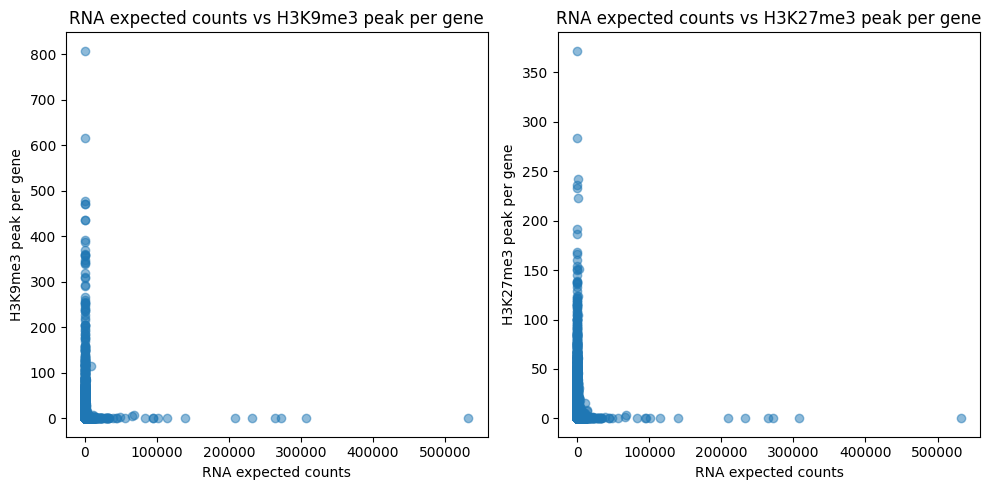

In [59]:
import matplotlib.pyplot as plt

# scatter plot for RNA expression vs. K9 Count
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(rna_histone_mods_merged_df['expected_count'], rna_histone_mods_merged_df['k9_peak_count'], alpha=0.5)
plt.title('RNA expected counts vs H3K9me3 peak per gene')
plt.xlabel('RNA expected counts')
plt.ylabel('H3K9me3 peak per gene')

# scatter plot for expression  vs. K27 Count
plt.subplot(1, 2, 2)
plt.scatter(rna_histone_mods_merged_df['expected_count'], rna_histone_mods_merged_df['k27_peak_count'], alpha=0.5)
plt.title('RNA expected counts vs H3K27me3 peak per gene')
plt.xlabel('RNA expected counts')
plt.ylabel('H3K27me3 peak per gene')

plt.tight_layout()
plt.show()

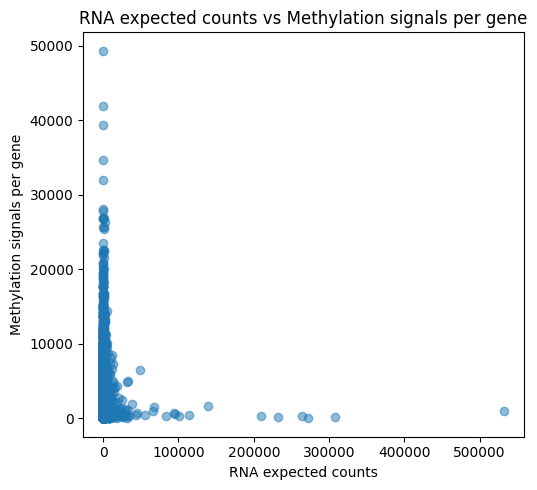

In [60]:
import matplotlib.pyplot as plt

# scatter plot for RNA expression vs. methylation count
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(rna_histone_mods_merged_df['expected_count'], rna_histone_mods_merged_df['methyl_count'], alpha=0.5)
plt.title('RNA expected counts vs Methylation signals per gene')
plt.xlabel('RNA expected counts')
plt.ylabel('Methylation signals per gene')

plt.tight_layout()
plt.show()

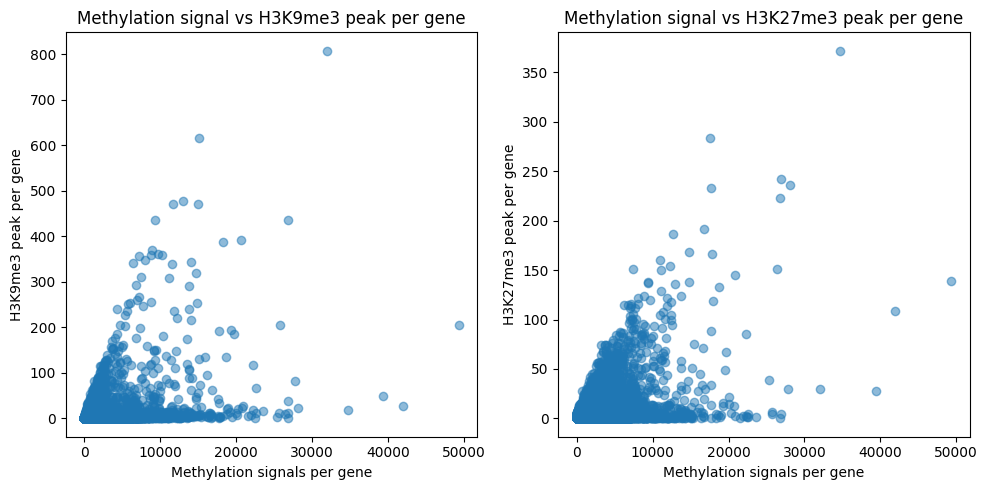

In [61]:
import matplotlib.pyplot as plt

# scatter plot for Methylation signal vs. K9 Count
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(rna_histone_mods_merged_df['methyl_count'], rna_histone_mods_merged_df['k9_peak_count'], alpha=0.5)
plt.title('Methylation signal vs H3K9me3 peak per gene')
plt.xlabel('Methylation signals per gene')
plt.ylabel('H3K9me3 peak per gene')

# scatter plot for Methylation signa vs. K27 Count
plt.subplot(1, 2, 2)
plt.scatter(rna_histone_mods_merged_df['methyl_count'], rna_histone_mods_merged_df['k27_peak_count'], alpha=0.5)
plt.title('Methylation signal vs H3K27me3 peak per gene')
plt.xlabel('Methylation signals per gene')
plt.ylabel('H3K27me3 peak per gene')

plt.tight_layout()
plt.show()

normalise (gene length)
+-2kb only at TSS (using start and end dependent on strand)
- 2KB on either side of sart site (4KB total window)
length normaised too 
- TSS are better correlated
- suggests ML model needed and TSS is less noise (higher correlation)


scales
- average
- bucket 200 for methylation (visualisation purposes)



Correlation scores between methylation signals and histone modifications

In [62]:
from scipy.stats import pearsonr, spearmanr, kendalltau

#  Pearson correlation (linear)
pearson_corr_k9, _ = pearsonr(rna_histone_mods_merged_df['methyl_count'], rna_histone_mods_merged_df['k9_peak_count'])
pearson_corr_k27, _ = pearsonr(rna_histone_mods_merged_df['methyl_count'], rna_histone_mods_merged_df['k27_peak_count'])

print('Pearson Correlation for k9:', pearson_corr_k9,
      '\nPearson Correlation for k27:', pearson_corr_k27)

#  Spearman correlation
spearman_corr_k9, _ = spearmanr(rna_histone_mods_merged_df['methyl_count'], rna_histone_mods_merged_df['k9_peak_count'])
spearman_corr_k27, _ = spearmanr(rna_histone_mods_merged_df['methyl_count'], rna_histone_mods_merged_df['k27_peak_count'])

print('Spearman Correlation for k9:', spearman_corr_k9,
      '\nSpearman Correlation for k27:', spearman_corr_k27)

#  Kendall Tau correlation
kendall_corr_k9, _ = kendalltau(rna_histone_mods_merged_df['methyl_count'], rna_histone_mods_merged_df['k9_peak_count'])
kendall_corr_k27, _ = kendalltau(rna_histone_mods_merged_df['methyl_count'], rna_histone_mods_merged_df['k27_peak_count'])

print('Kendall Tau Correlation:', kendall_corr_k9,
      '\nKendall Correlation for k27:', kendall_corr_k27)

Pearson Correlation for k9: 0.35485045246855595 
Pearson Correlation for k27: 0.4973298470082079
Spearman Correlation for k9: 0.2478430787042311 
Spearman Correlation for k27: 0.37607411912315974
Kendall Tau Correlation: 0.19713032821934004 
Kendall Correlation for k27: 0.29827940482727033


Correlations are relatively weak - mild but stronger than expected considering the complexity of the relationship:
- Pearson Correlation for k9: 0.35485045246855595 
- Pearson Correlation for k27: 0.4973298470082079

## Additional investigation into DNA methylation normalised by gene length (still utilising dilated genes)

In [15]:
wgbs_aggregated_norm = pd.read_csv("HepG2_data/HepG2_DNAm/aggregated/wgbs_norm_aggregated_gene_counts.csv")
display(wgbs_aggregated_norm)

,gene_id,gene_length,count,norm_count
0,ENSG00000000003.14,16882,356,0.021088
1,ENSG00000000005.5,19083,170,0.008908
2,ENSG00000000419.12,27688,803,0.029002
3,ENSG00000000457.13,48636,786,0.016161
4,ENSG00000000460.16,196073,2690,0.013719
...,...,...,...,...
58222,ENSG00000285990.1,28476,119,0.004179
58223,ENSG00000285991.1,82074,2046,0.024929
58224,ENSG00000285992.1,7366,213,0.028917
58225,ENSG00000285993.1,5448,72,0.013216


In [20]:
wgbs_aggregated_norm_idx = wgbs_aggregated_norm.set_index('gene_id')
wgbs_aggregated_norm_idx = wgbs_aggregated_norm_idx.drop(['gene_length', 'count'], axis=1)


In [24]:
rna_histone_mods_wgbs_norm_merged_df = rna_genes_expected_count_idx.merge(k9_peaks_per_gene_idx, how = 'left', left_index=True, right_index=True)\
                            .merge(k27_peaks_per_gene_idx, how = 'left', left_index=True, right_index=True)\
                            .merge(wgbs_aggregated_norm_idx, how = 'left', left_index=True, right_index=True)
display(rna_histone_mods_wgbs_norm_merged_df)
rna_histone_mods_wgbs_norm_merged_df['k9_peak_count'].fillna(0, inplace=True)
rna_histone_mods_wgbs_norm_merged_df['k27_peak_count'].fillna(0, inplace=True)
rna_histone_mods_wgbs_norm_merged_df['norm_count'].fillna(0, inplace=True)
display(rna_histone_mods_wgbs_norm_merged_df)

,expected_count,k9_peak_count,k27_peak_count,norm_count
gene_id,,,,
ENSG00000000003.14,2019.00,NaN,NaN,0.021088
ENSG00000000005.5,0.00,NaN,NaN,0.008908
ENSG00000000419.12,887.00,NaN,NaN,0.029002
ENSG00000000457.13,258.00,1.0,NaN,0.016161
ENSG00000000460.16,879.00,1.0,4.0,0.013719
...,...,...,...,...
ENSG00000285990.1,0.75,NaN,NaN,0.004179
ENSG00000285991.1,14.93,NaN,11.0,0.024929
ENSG00000285992.1,0.00,NaN,NaN,0.028917


,expected_count,k9_peak_count,k27_peak_count,norm_count
gene_id,,,,
ENSG00000000003.14,2019.00,0.0,0.0,0.021088
ENSG00000000005.5,0.00,0.0,0.0,0.008908
ENSG00000000419.12,887.00,0.0,0.0,0.029002
ENSG00000000457.13,258.00,1.0,0.0,0.016161
ENSG00000000460.16,879.00,1.0,4.0,0.013719
...,...,...,...,...
ENSG00000285990.1,0.75,0.0,0.0,0.004179
ENSG00000285991.1,14.93,0.0,11.0,0.024929
ENSG00000285992.1,0.00,0.0,0.0,0.028917


### plotting normalised methylation

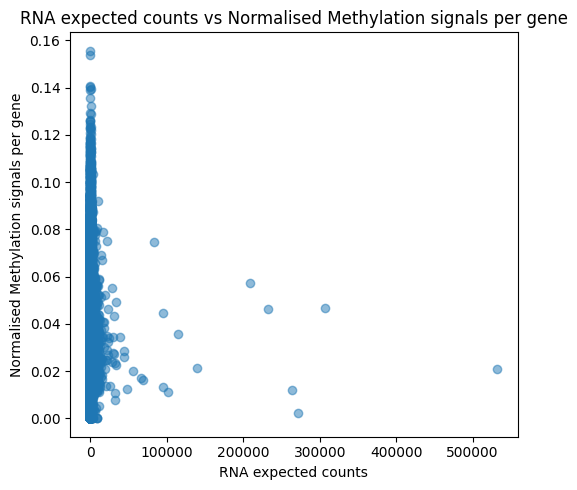

In [26]:
import matplotlib.pyplot as plt

# scatter plot for RNA expression vs. methylation count
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(rna_histone_mods_wgbs_norm_merged_df['expected_count'], rna_histone_mods_wgbs_norm_merged_df['norm_count'], alpha=0.5)
plt.title('RNA expected counts vs Normalised Methylation signals per gene')
plt.xlabel('RNA expected counts')
plt.ylabel('Normalised Methylation signals per gene')

plt.tight_layout()
plt.show()

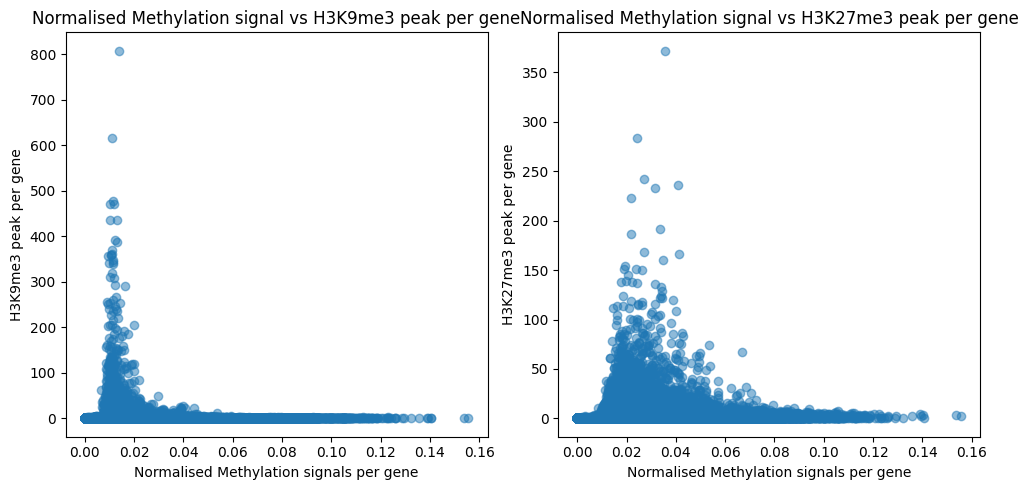

In [27]:
import matplotlib.pyplot as plt

# scatter plot for Methylation signal vs. K9 Count
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(rna_histone_mods_wgbs_norm_merged_df['norm_count'], rna_histone_mods_wgbs_norm_merged_df['k9_peak_count'], alpha=0.5)
plt.title('Normalised Methylation signal vs H3K9me3 peak per gene')
plt.xlabel('Normalised Methylation signals per gene')
plt.ylabel('H3K9me3 peak per gene')

# scatter plot for Methylation signa vs. K27 Count
plt.subplot(1, 2, 2)
plt.scatter(rna_histone_mods_wgbs_norm_merged_df['norm_count'], rna_histone_mods_wgbs_norm_merged_df['k27_peak_count'], alpha=0.5)
plt.title('Normalised Methylation signal vs H3K27me3 peak per gene')
plt.xlabel('Normalised Methylation signals per gene')
plt.ylabel('H3K27me3 peak per gene')

plt.tight_layout()
plt.show()

In [24]:
### testing for new tss gene file

tss_gtf = pd.read_csv('HepG2_data/RefGenomes/gencode.v29.chr_patch_hapl_scaff.basic.annotation.gtf', header=None, delimiter='\t', nrows=10000, skiprows=5, names=[
            "chrom",
            "source",
            "feature_type",
            "start",
            "end",
            "score",
            "strand",
            "frame",
            "attributes",
        ],)
display(tss_gtf[tss_gtf['feature_type'] == 'gene'])

tss_2kb = pd.read_csv('HepG2_data/RefGenomes/tss_2kb.gtf', header=None, delimiter='\t', nrows=10000)
display(tss_2kb[tss_gtf['feature_type'] == 'gene'])

,chrom,source,feature_type,start,end,score,strand,frame,attributes
0,chr1,HAVANA,gene,11869,14409,.,+,.,"gene_id ""ENSG00000223972.5""; gene_type ""transc..."
12,chr1,HAVANA,gene,14404,29570,.,-,.,"gene_id ""ENSG00000227232.5""; gene_type ""unproc..."
25,chr1,ENSEMBL,gene,17369,17436,.,-,.,"gene_id ""ENSG00000278267.1""; gene_type ""miRNA""..."
28,chr1,HAVANA,gene,29554,31109,.,+,.,"gene_id ""ENSG00000243485.5""; gene_type ""lincRN..."
36,chr1,ENSEMBL,gene,30366,30503,.,+,.,"gene_id ""ENSG00000284332.1""; gene_type ""miRNA""..."
...,...,...,...,...,...,...,...,...,...
9884,chr1,HAVANA,gene,9501092,9503471,.,-,.,"gene_id ""ENSG00000235263.1""; gene_type ""lincRN..."
9888,chr1,HAVANA,gene,9539482,9585179,.,+,.,"gene_id ""ENSG00000171612.6""; gene_type ""protei..."
9908,chr1,HAVANA,gene,9576427,9576985,.,+,.,"gene_id ""ENSG00000231181.1""; gene_type ""proces..."
9911,chr1,HAVANA,gene,9588922,9614873,.,+,.,"gene_id ""ENSG00000188807.12""; gene_type ""prote..."


,0,1,2,3,4,5,6,7,8
0,chr1,HAVANA,gene,9869,13869,.,+,.,"gene_id ""ENSG00000223972.5""; gene_type ""transc..."
12,chr1,HAVANA,gene,27570,31570,.,-,.,"gene_id ""ENSG00000227232.5""; gene_type ""unproc..."
25,chr1,ENSEMBL,gene,15436,19436,.,-,.,"gene_id ""ENSG00000278267.1""; gene_type ""miRNA""..."
28,chr1,HAVANA,gene,27554,31554,.,+,.,"gene_id ""ENSG00000243485.5""; gene_type ""lincRN..."
36,chr1,ENSEMBL,gene,28366,32366,.,+,.,"gene_id ""ENSG00000284332.1""; gene_type ""miRNA""..."
...,...,...,...,...,...,...,...,...,...
9884,chr1,HAVANA,gene,9501471,9505471,.,-,.,"gene_id ""ENSG00000235263.1""; gene_type ""lincRN..."
9888,chr1,HAVANA,gene,9537482,9541482,.,+,.,"gene_id ""ENSG00000171612.6""; gene_type ""protei..."
9908,chr1,HAVANA,gene,9574427,9578427,.,+,.,"gene_id ""ENSG00000231181.1""; gene_type ""proces..."
9911,chr1,HAVANA,gene,9586922,9590922,.,+,.,"gene_id ""ENSG00000188807.12""; gene_type ""prote..."


# comparing peak and wgbs data at base-level

RNA

In [39]:
# loading RNA file 
RNA_geneQuant_df = pd.read_csv('HepG2_data/HepG2_DNAm/ENCFF649XOG.tsv', sep='\t', header=0)
display(RNA_geneQuant_df)

# filter rna rows to include only the genes
rna_genes = RNA_geneQuant_df.loc[RNA_geneQuant_df['gene_id'].str.contains("ENS")]
display(rna_genes)

# each row = 1 gene (already aggregated) so selecting necessary columns
rna_genes_expected_count = rna_genes[['gene_id', 'expected_count']].set_index('gene_id')
display(rna_genes_expected_count)

,gene_id,transcript_id(s),length,effective_length,expected_count,TPM,FPKM,posterior_mean_count,posterior_standard_deviation_of_count,pme_TPM,pme_FPKM,TPM_ci_lower_bound,TPM_ci_upper_bound,TPM_coefficient_of_quartile_variation,FPKM_ci_lower_bound,FPKM_ci_upper_bound,FPKM_coefficient_of_quartile_variation
0,10904,10904,93.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,12954,12954,94.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,12956,12956,72.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,12958,12958,82.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,12960,12960,73.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59521,gSpikein_ERCC-00165,tSpikein_ERCC-00165,872.0,700.78,87.0,4.47,8.43,87.0,0.0,4.33,8.42,3.439680,5.244820,0.071704,6.672670,10.182700,0.071661
59522,gSpikein_ERCC-00168,tSpikein_ERCC-00168,1024.0,852.78,1.0,0.04,0.08,1.0,0.0,0.08,0.16,0.002566,0.194005,0.474234,0.005171,0.377749,0.474374
59523,gSpikein_ERCC-00170,tSpikein_ERCC-00170,1023.0,851.78,51.0,2.16,4.07,51.0,0.0,2.10,4.09,1.548640,2.687830,0.093629,3.011470,5.228390,0.093579
59524,gSpikein_ERCC-00171,tSpikein_ERCC-00171,505.0,333.85,3942.0,425.45,802.16,3942.0,0.0,406.87,791.53,394.250000,419.834000,0.010739,767.089000,816.791000,0.010720


,gene_id,transcript_id(s),length,effective_length,expected_count,TPM,FPKM,posterior_mean_count,posterior_standard_deviation_of_count,pme_TPM,pme_FPKM,TPM_ci_lower_bound,TPM_ci_upper_bound,TPM_coefficient_of_quartile_variation,FPKM_ci_lower_bound,FPKM_ci_upper_bound,FPKM_coefficient_of_quartile_variation
649,ENSG00000000003.14,"ENST00000373020.8,ENST00000494424.1,ENST000004...",2179.14,2007.92,2019.00,36.23,68.31,2019.00,0.00,34.91,67.91,3.334520e+01,36.533100,0.015839,6.478720e+01,70.974500,0.015831
650,ENSG00000000005.5,"ENST00000373031.4,ENST00000485971.1",940.50,769.31,0.00,0.00,0.00,0.00,0.00,0.12,0.24,1.760980e-03,0.313410,0.511119,3.288750e-03,0.609651,0.511279
651,ENSG00000000419.12,"ENST00000371582.8,ENST00000371584.8,ENST000003...",1078.03,906.82,887.00,35.24,66.45,887.00,0.00,34.27,66.67,3.199170e+01,36.595700,0.023183,6.222900e+01,71.169600,0.023156
652,ENSG00000000457.13,"ENST00000367770.5,ENST00000367771.10,ENST00000...",3488.94,3317.73,258.00,2.80,5.28,258.00,0.00,2.79,5.43,2.313660e+00,3.287400,0.060300,4.505810e+00,6.399090,0.060332
653,ENSG00000000460.16,"ENST00000286031.10,ENST00000359326.8,ENST00000...",2911.75,2740.54,879.00,11.56,21.79,879.00,0.00,11.50,22.37,1.024230e+01,12.846600,0.039000,1.991680e+01,24.984000,0.038972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59424,ENSG00000285990.1,ENST00000649331.1,647.00,475.81,0.75,0.06,0.11,1.80,1.60,0.20,0.39,5.294150e-06,0.530734,0.602857,1.030280e-05,1.032140,0.602870
59425,ENSG00000285991.1,ENST00000647612.1,5065.00,4893.78,14.93,0.11,0.21,17.18,5.91,0.13,0.25,4.175390e-02,0.234562,0.266380,7.841970e-02,0.453671,0.266300
59426,ENSG00000285992.1,ENST00000648949.1,956.00,784.78,0.00,0.00,0.00,0.00,0.00,0.04,0.09,1.021180e-06,0.131430,0.654743,2.449570e-06,0.255766,0.654939
59427,ENSG00000285993.1,ENST00000650266.1,1246.00,1074.78,0.00,0.00,0.00,0.00,0.00,0.03,0.06,2.000310e-06,0.095424,0.654978,3.892870e-06,0.185655,0.655171


,expected_count
gene_id,
ENSG00000000003.14,2019.00
ENSG00000000005.5,0.00
ENSG00000000419.12,887.00
ENSG00000000457.13,258.00
ENSG00000000460.16,879.00
...,...
ENSG00000285990.1,0.75
ENSG00000285991.1,14.93
ENSG00000285992.1,0.00


Histone Peak files (now 2KB annotation and separated into single rows)

In [42]:
#annotated peak data - K27 ready yet

h3k9me3_underpeak = pd.read_csv('HepG2_data/HepG2_histone/aggregated/h3k9me3_agg_2kb_gene_counts.csv').set_index('gene_id')
h3k27me3_underpeak = pd.read_csv('HepG2_data/HepG2_histone/aggregated/h3k27me3_agg_2kb_gene_counts.csv').set_index('gene_id')

# rename under_peak column to differentiate
h3k9me3_underpeak = h3k9me3_underpeak.rename(columns = {'under_peak_count':'k9_under_peak_count'})
h3k27me3_underpeak = h3k27me3_underpeak.rename(columns = {'under_peak_count':'k27_under_peak_count'})

display(h3k9me3_underpeak)
display(h3k27me3_underpeak)

,k9_under_peak_count
gene_id,
ENSG00000003137.8,662
ENSG00000018869.16,2388
ENSG00000024422.11,618
ENSG00000026751.16,667
ENSG00000032742.17,791
...,...
ENSG00000285861.1,804
ENSG00000285878.1,4965
ENSG00000285934.1,3102


,k27_under_peak_count
gene_id,
ENSG00000000938.12,733
ENSG00000001561.6,115
ENSG00000002746.14,126
ENSG00000002834.17,202
ENSG00000003096.14,296
...,...
ENSG00000285968.1,283
ENSG00000285971.1,369
ENSG00000285980.1,456


In [38]:
# loading annotated wgbs data (+-2KB)
wgbs_2kb_agg = pd.read_csv('HepG2_data/HepG2_DNAm/aggregated/wgbs_agg_2kb_gene_counts.csv')
wgbs_2kb_agg = wgbs_2kb_agg.set_index('gene_id')
wgbs_2kb_agg = wgbs_2kb_agg.drop(['gene_length', 'norm_count'], axis=1)
display(wgbs_2kb_agg)


,count
gene_id,
ENSG00000000003.14,56
ENSG00000000005.5,23
ENSG00000000419.12,320
ENSG00000000457.13,181
ENSG00000000460.16,119
...,...
ENSG00000285990.1,38
ENSG00000285991.1,99
ENSG00000285992.1,84


merging data

In [43]:
rna_histone_mods_wgbs_norm_merged_df = rna_genes_expected_count.merge(h3k9me3_underpeak, how = 'left', left_index=True, right_index=True)\
                            .merge(h3k27me3_underpeak, how = 'left', left_index=True, right_index=True)\
                            .merge(wgbs_2kb_agg, how = 'left', left_index=True, right_index=True)
display(rna_histone_mods_wgbs_norm_merged_df)
rna_histone_mods_wgbs_norm_merged_df['k9_under_peak_count'].fillna(0, inplace=True)
rna_histone_mods_wgbs_norm_merged_df['k27_under_peak_count'].fillna(0, inplace=True)
rna_histone_mods_wgbs_norm_merged_df['count'].fillna(0, inplace=True)
display(rna_histone_mods_wgbs_norm_merged_df)

,expected_count,k9_under_peak_count,k27_under_peak_count,count
gene_id,,,,
ENSG00000000003.14,2019.00,NaN,NaN,56.0
ENSG00000000005.5,0.00,NaN,NaN,23.0
ENSG00000000419.12,887.00,NaN,NaN,320.0
ENSG00000000457.13,258.00,NaN,NaN,181.0
ENSG00000000460.16,879.00,NaN,NaN,119.0
...,...,...,...,...
ENSG00000285990.1,0.75,NaN,NaN,38.0
ENSG00000285991.1,14.93,NaN,NaN,99.0
ENSG00000285992.1,0.00,NaN,NaN,84.0


,expected_count,k9_under_peak_count,k27_under_peak_count,count
gene_id,,,,
ENSG00000000003.14,2019.00,0.0,0.0,56.0
ENSG00000000005.5,0.00,0.0,0.0,23.0
ENSG00000000419.12,887.00,0.0,0.0,320.0
ENSG00000000457.13,258.00,0.0,0.0,181.0
ENSG00000000460.16,879.00,0.0,0.0,119.0
...,...,...,...,...
ENSG00000285990.1,0.75,0.0,0.0,38.0
ENSG00000285991.1,14.93,0.0,0.0,99.0
ENSG00000285992.1,0.00,0.0,0.0,84.0


plotting data

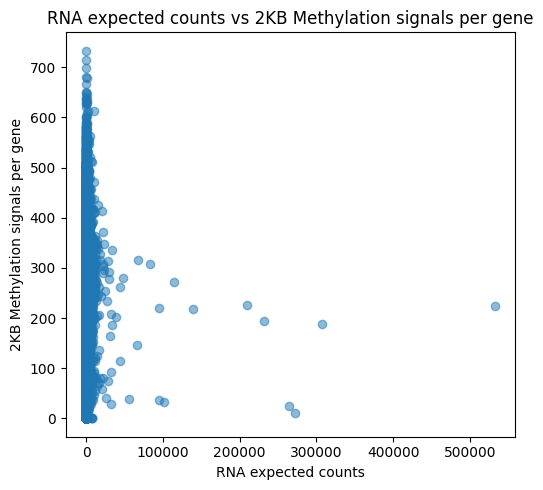

In [44]:
import matplotlib.pyplot as plt

# scatter plot for RNA expression vs. methylation count
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(rna_histone_mods_wgbs_norm_merged_df['expected_count'], rna_histone_mods_wgbs_norm_merged_df['count'], alpha=0.5)
plt.title('RNA expected counts vs 2KB Methylation signals per gene')
plt.xlabel('RNA expected counts')
plt.ylabel('2KB Methylation signals per gene')

plt.tight_layout()
plt.show()

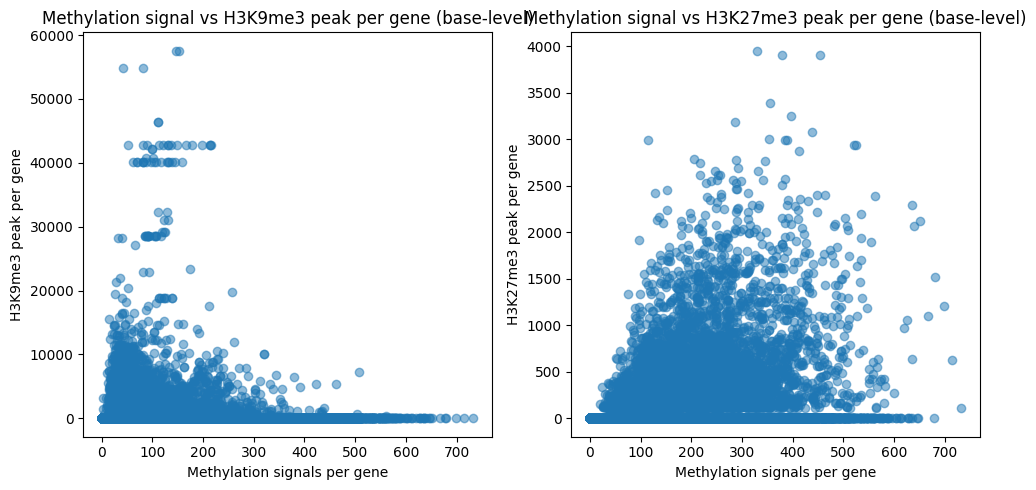

In [46]:
import matplotlib.pyplot as plt

# scatter plot for Methylation signal vs. K9 Count
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(rna_histone_mods_wgbs_norm_merged_df['count'], rna_histone_mods_wgbs_norm_merged_df['k9_under_peak_count'], alpha=0.5)
plt.title('Methylation signal vs H3K9me3 peak per gene (base-level)')
plt.xlabel('Methylation signals per gene')
plt.ylabel('H3K9me3 peak per gene')

# scatter plot for Methylation signa vs. K27 Count
plt.subplot(1, 2, 2)
plt.scatter(rna_histone_mods_wgbs_norm_merged_df['count'], rna_histone_mods_wgbs_norm_merged_df['k27_under_peak_count'], alpha=0.5)
plt.title('Methylation signal vs H3K27me3 peak per gene (base-level)')
plt.xlabel('Methylation signals per gene')
plt.ylabel('H3K27me3 peak per gene')

plt.tight_layout()
plt.show()